**Name : Sohaila Mahmoud Elsayed**

**The Sparks Foundation data science intern**

**Task#1**:Predict the percentage of a student based on the no. of study hours using supervised ML(Linear Regression)

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

**Loading The Dataset**

In [2]:
df  = pd.read_csv("http://bit.ly/w-data")
print("the shape of the dataset is: ", df.shape )
df.head()

the shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As you see that the dataset consists only from two numerical columns (variables) and 25 rows, so the prediction of the score is dependent only on studing's hours

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Here we got some inforamtion about the dataset like we don't have any null values in the dataset

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here we got some statistical description such as mean, quantiles

**Plotting to find relation between two variables**

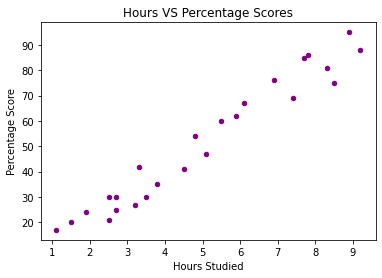

In [5]:
df.plot(kind = "scatter", x = 'Hours', y = 'Scores', color = 'purple')
plt.title('Hours VS Percentage Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

This figure shows that the dataset is linear, we can use linear regression model to predict the score given studing's hours

**prepering the data and Splitting it into training and testing**

In [6]:
X_train, X_test, y_train, y_test =train_test_split(df['Hours'], df['Scores'], 
                             random_state=42, test_size = 0.3)

In [7]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 1)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train.shape

(17, 1)

**Training the model and predicting on test set**

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [9]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df1 

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


In [10]:
Hours = np.array(9.25).reshape(-1,1)
Score = model.predict(Hours)
print ("no. of hours =", Hours[0,0])
print("Predicted Score = ", Score[0])

no. of hours = 9.25
Predicted Score =  92.61670033840096


<function matplotlib.pyplot.show>

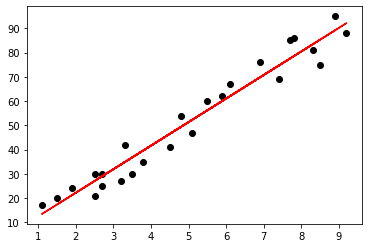

In [11]:
# Plotting the regression line
line = model.coef_ * df['Hours'] + model.intercept_
plt.scatter(df['Hours'], df['Scores'], color = 'black')
plt.plot(df['Hours'], line, color = 'red')
plt.show

**Evaluating The Model**

In [12]:
score = model.score(X_test, y_test)
print("The score of the model :", score)

The score of the model : 0.9487647340257012


In [13]:
print("Mean Squared Error: ", mean_squared_error(y_predicted, y_test))
print("Mean Absolure Error: ", mean_absolute_error(y_predicted, y_test))

Mean Squared Error:  23.61945761415174
Mean Absolure Error:  4.499999999999998
